#**Area Under Curve and Receiver Operating Characteristic Curve**

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
import warnings
warnings.filterwarnings('ignore')



df = read_csv('/content/pima-indians-diabetes.csv')

X = df.drop('class',axis = 1)
Y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)


classifier1 = LogisticRegression()

classifier2 = svm.SVC(kernel='linear', probability=True)


probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

True positive == Recall

The *false positive rate* is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events (regardless of classification).

FP/FP+TN:

In [2]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1]) 
roc_auc1 = auc(fpr1, tpr1) #tpr & fpr : true positive & false positive
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.830152


In [3]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.836073


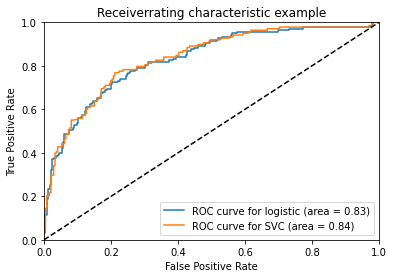

In [4]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the diabetes and no diabetes.